In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

%matplotlib inline

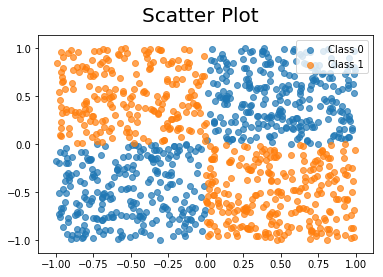

In [2]:
# Generate XOR data
np.random.seed(20180324)

x_data = np.random.uniform(-1,1, [1000,2])
y_data = np.array([0 if x_data[i][0]*x_data[i][1] >= 0. 
                   else 1 for i in range(len(x_data))])

plt.suptitle("Scatter Plot", fontsize=20)
plt.scatter(x_data[y_data == 0, 0], x_data[y_data == 0, 1], label="Class 0", alpha=0.7)
plt.scatter(x_data[y_data == 1, 0], x_data[y_data == 1, 1], label="Class 1", alpha=0.7)
plt.legend()

x_train, x_test, y_train, y_test = \
train_test_split(x_data, y_data, test_size=0.3, random_state=777)

## Binary classification with MLP
![](data/bcm.png)

- Input layer & output layer
- 2 Hidden layers

Step : 1000, Cost : 0.609037  Accuracy : 0.64
Step : 2000, Cost : 0.535361  Accuracy : 0.688571
Step : 3000, Cost : 0.418479  Accuracy : 0.862857
Step : 4000, Cost : 0.291241  Accuracy : 0.944286
Step : 5000, Cost : 0.214302  Accuracy : 0.971429
Step : 6000, Cost : 0.172538  Accuracy : 0.978571
Step : 7000, Cost : 0.147263  Accuracy : 0.978571
Step : 8000, Cost : 0.13013  Accuracy : 0.982857
Step : 9000, Cost : 0.117545  Accuracy : 0.981429
Step : 10000, Cost : 0.10778  Accuracy : 0.985714


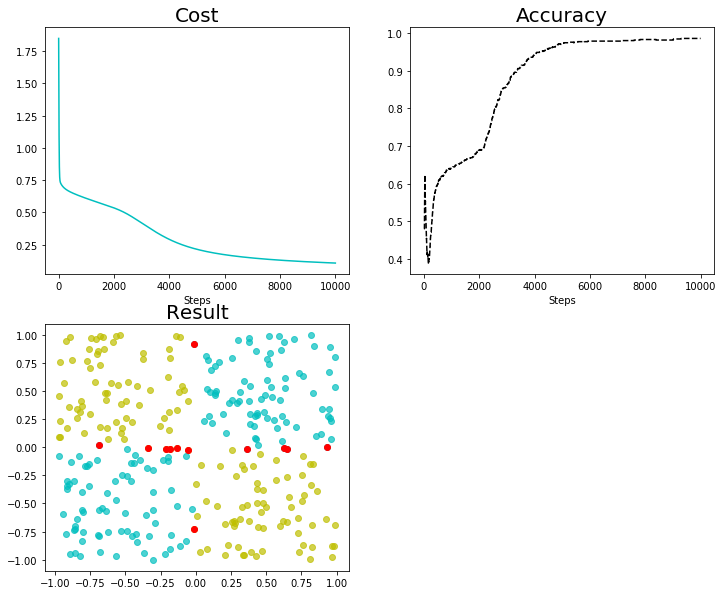

In [3]:
X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None,1])

# Variable
W0 = tf.Variable(tf.random_normal([2,20]), dtype=tf.float32)
b0 = tf.Variable(tf.random_normal([20]), dtype=tf.float32)

W1 = tf.Variable(tf.random_normal([20,10]), dtype=tf.float32)
b1 = tf.Variable(tf.random_normal([10]), dtype=tf.float32)

W2 = tf.Variable(tf.random_normal([10,1]), dtype=tf.float32)
b2 = tf.Variable(tf.random_normal([1]), dtype=tf.float32)


def model(inputs):
    H0 = tf.sigmoid(tf.matmul(inputs,W0)+b0)
    H1 = tf.sigmoid(tf.matmul(H0,W1)+b1)
    H = tf.sigmoid(tf.matmul(H1,W2)+b2)
    
    return H

H = model(X)
    
    
loss = - tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []

iteration = 10000
for step in range(iteration):
    acc, cost, _, = sess.run([accuracy, loss,  train],
                             feed_dict={X: x_train, Y: np.reshape(y_train, [-1,1])})
    cost_list.append(cost)
    acc_list.append(acc)
    if (step+1) % (iteration//10) ==0:
        print("Step : %i, Cost : %s  Accuracy : %s" %(step+1, cost, acc)) 

plt.figure(figsize=(12,10))     
plt.subplot(221)
plt.xlabel("Steps")
plt.title("Cost", fontsize=20)
_ = plt.plot(cost_list, "c")

plt.subplot(222)
plt.xlabel("Steps")
plt.title("Accuracy", fontsize=20)
_ = plt.plot(acc_list, "k--")

Hypothesis = sess.run(H, feed_dict={X: x_test})

plt.subplot(223)
plt.title("Result", fontsize=20)
for i, j in enumerate(Hypothesis):
    if j > 0.5 : 
        _ = plt.plot(x_test[i][0], x_test[i][1], "yo", alpha=0.7)
    else :
        _ = plt.plot(x_test[i][0], x_test[i][1], "co", alpha=0.7)
for i in range(len(Hypothesis)):
    if np.around(Hypothesis)[i] != y_test[i]:
        _ = plt.plot(x_test[i][0], x_test[i][1], "ro")

# 같은 MLP 모델을 다른 데이터에 적용하기

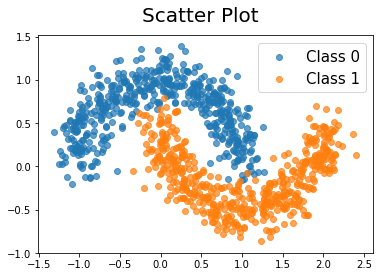

In [4]:
# Moon data
x_moon, y_moon = make_moons(n_samples=1000, shuffle=True, noise=0.15, random_state=10)

plt.suptitle("Scatter Plot", fontsize=20)
plt.scatter(x_moon[y_moon == 0, 0], x_moon[y_moon == 0, 1], label="Class 0", alpha=0.7)
plt.scatter(x_moon[y_moon == 1, 0], x_moon[y_moon == 1, 1], label="Class 1", alpha=0.7)
plt.legend(fontsize=15)

x_train, x_test, y_train, y_test = \
train_test_split(x_moon, y_moon, test_size=0.3, random_state=777)

Step : 1000, Cost : 0.354108  Accuracy : 0.841429
Step : 2000, Cost : 0.267062  Accuracy : 0.887143
Step : 3000, Cost : 0.250666  Accuracy : 0.892857
Step : 4000, Cost : 0.23851  Accuracy : 0.902857
Step : 5000, Cost : 0.221315  Accuracy : 0.915714
Step : 6000, Cost : 0.197876  Accuracy : 0.918571
Step : 7000, Cost : 0.169491  Accuracy : 0.931429
Step : 8000, Cost : 0.140305  Accuracy : 0.944286
Step : 9000, Cost : 0.11466  Accuracy : 0.954286
Step : 10000, Cost : 0.0944324  Accuracy : 0.967143


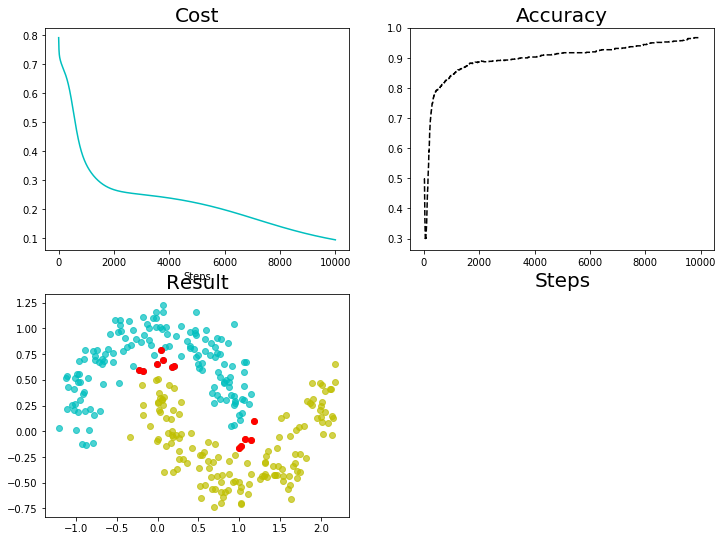

In [5]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []

iteration = 10000
for step in range(iteration):
    acc, cost, _, = sess.run([accuracy, loss,  train],
                             feed_dict={X: x_train, Y: np.reshape(y_train, [-1,1])})
    cost_list.append(cost)
    acc_list.append(acc)
    if (step+1) % (iteration//10) ==0:
        print("Step : %i, Cost : %s  Accuracy : %s" %(step+1, cost, acc)) 

plt.figure(figsize=(12,9))     
plt.subplot(221)
plt.title("Cost", fontsize=20)
plt.xlabel("Steps")
_ = plt.plot(cost_list, "c")

plt.subplot(222)
plt.title("Accuracy", fontsize=20)
plt.xlabel("Steps", fontsize=20)
_ = plt.plot(acc_list, "k--")

Hypothesis = sess.run(H, feed_dict={X: x_test})


plt.subplot(223)
plt.title("Result", fontsize=20)
for i, j in enumerate(Hypothesis):
    if j > 0.5 : 
        _ = plt.plot(x_test[i][0], x_test[i][1], "yo", alpha=0.7)
    else :
        _ = plt.plot(x_test[i][0], x_test[i][1], "co", alpha=0.7)
for i in range(len(Hypothesis)):
    if np.around(Hypothesis)[i] != y_test[i]:
        plt.plot(x_test[i][0], x_test[i][1], "ro")